In [1]:
import pandas as pd
from Bio import SeqIO


In [2]:
train_stats = pd.read_csv('train_stats.csv')
train_stats.sample(3)

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
76192,76192,ENST00000316603.12|ENSG00000168259.17|OTTHUMG0...,1713,17,15,283,346,349
135478,135478,ENST00000697004.1|ENSG00000142687.19|OTTHUMG00...,4319,43,23,244,512,512
110758,110758,ENST00000395679.3|ENSG00000213690.3|OTTHUMG000...,510,5,4,58,107,106


In [3]:
train_stats

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
0,0,ENST00000610331.1|ENSG00000276334.1|OTTHUMG000...,1621,16,12,200,310,311
1,1,ENST00000609885.1|ENSG00000237054.9|OTTHUMG000...,858,8,7,13,171,171
2,2,ENST00000398238.8|ENSG00000073969.19|OTTHUMG00...,3983,39,30,337,512,512
3,3,ENST00000531439.5|ENSG00000137693.14|OTTHUMG00...,1490,14,12,265,304,302
4,4,ENST00000678821.1|ENSG00000104218.16|OTTHUMG00...,3199,31,24,475,512,512
...,...,...,...,...,...,...,...,...
203251,203251,ENST00000527837.1|ENSG00000254455.1|OTTHUMG000...,282,2,2,2,62,62
203252,203252,ENST00000493812.2|ENSG00000223776.5|OTTHUMG000...,1430,14,11,240,297,294
203253,203253,ENST00000486291.1|ENSG00000115993.13|OTTHUMG00...,883,8,6,35,182,181
203254,203254,ENST00000689140.2|ENSG00000281103.4|OTTHUMG000...,482,4,4,58,100,98


<Axes: xlabel='DNA sequnce length', ylabel='number of SNP mutations'>

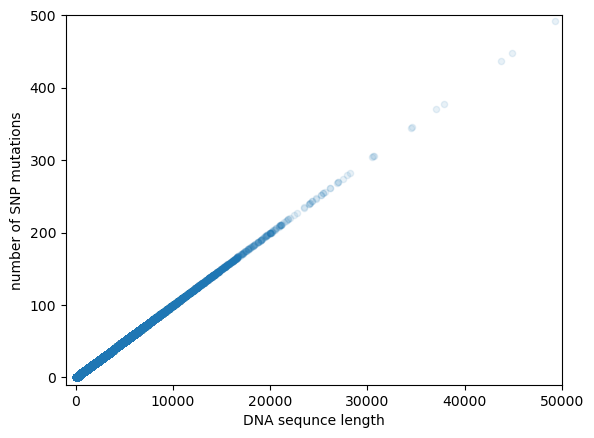

In [22]:
train_stats.plot.scatter(x='len_in_nucleotides', y='diff_in_nucleotides', alpha=0.1, xlabel='DNA sequnce length', ylabel='number of SNP mutations',ylim=(-10,500), xlim=(-1000,50_000))


In [8]:
train_stats.diff_in_nucleotides.describe()

count    203256.000000
mean         16.983179
std          22.292453
min           0.000000
25%           5.000000
50%           9.000000
75%          22.000000
max        3475.000000
Name: diff_in_nucleotides, dtype: float64

<Axes: xlabel='number of SNP mutations', ylabel='number of tokens changed'>

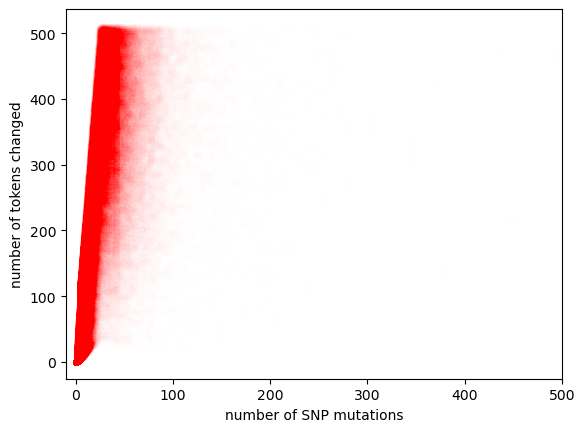

In [23]:
train_stats.plot.scatter(x='diff_in_nucleotides', y='diff_in_tokens', alpha=0.005, xlim=(-10,500), xlabel='number of SNP mutations', ylabel='number of tokens changed', color='red') 

<Axes: xlabel='length in tokens', ylabel='diff_in_tokens'>

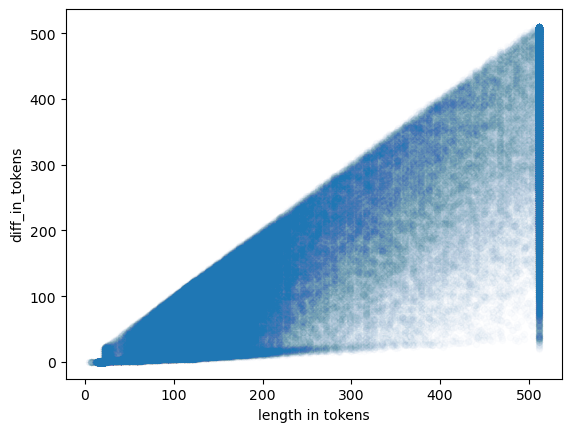

In [27]:
train_stats.plot.scatter(x='len_in_tokens_true', y='diff_in_tokens', alpha=0.01)

<Axes: xlabel='diff_in_nucleotides', ylabel='diff_in_amino_acids'>

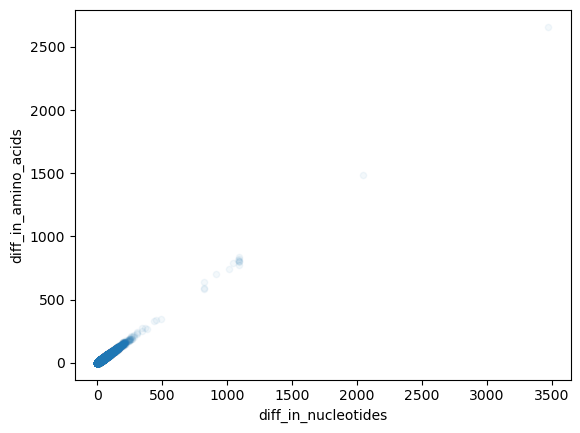

In [6]:
train_stats.plot.scatter(x='diff_in_nucleotides', y='diff_in_amino_acids', alpha=0.05)

In [7]:
train_stats[(train_stats.diff_in_amino_acids==0) & (train_stats.diff_in_nucleotides!=0)]

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
147,147,ENST00000650361.1|ENSG00000285912.1|-|-|5S_rRN...,119,1,0,1,27,27
459,459,ENST00000528546.1|ENSG00000255037.1|OTTHUMG000...,258,2,0,22,54,55
725,725,ENST00000516528.1|ENSG00000252337.1|-|-|ENST00...,139,1,0,1,29,29
842,842,ENST00000602325.1|ENSG00000269970.1|OTTHUMG000...,221,2,0,3,43,43
864,864,ENST00000678079.1|ENSG00000183735.11|OTTHUMG00...,234,2,0,6,48,48
...,...,...,...,...,...,...,...,...
202558,202558,ENST00000635931.1|ENSG00000101901.13|OTTHUMG00...,100,1,0,2,23,23
202639,202639,ENST00000411095.1|ENSG00000223027.1|-|-|ENST00...,141,1,0,1,31,31
202755,202755,ENST00000411164.1|ENSG00000223096.1|-|-|RNU5E-...,104,1,0,2,25,25
202765,202765,ENST00000603299.1|ENSG00000270321.2|OTTHUMG000...,193,1,0,37,40,41


In [8]:
train_stats[train_stats.diff_in_nucleotides > train_stats.diff_in_amino_acids]

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
0,0,ENST00000610331.1|ENSG00000276334.1|OTTHUMG000...,1621,16,12,200,310,311
1,1,ENST00000609885.1|ENSG00000237054.9|OTTHUMG000...,858,8,7,13,171,171
2,2,ENST00000398238.8|ENSG00000073969.19|OTTHUMG00...,3983,39,30,337,512,512
3,3,ENST00000531439.5|ENSG00000137693.14|OTTHUMG00...,1490,14,12,265,304,302
4,4,ENST00000678821.1|ENSG00000104218.16|OTTHUMG00...,3199,31,24,475,512,512
...,...,...,...,...,...,...,...,...
203248,203248,ENST00000587571.5|ENSG00000233725.7|OTTHUMG000...,920,9,6,15,178,178
203249,203249,ENST00000511912.6|ENSG00000171503.13|OTTHUMG00...,3111,31,25,341,512,512
203252,203252,ENST00000493812.2|ENSG00000223776.5|OTTHUMG000...,1430,14,11,240,297,294
203253,203253,ENST00000486291.1|ENSG00000115993.13|OTTHUMG00...,883,8,6,35,182,181


In [9]:
train_stats[train_stats.diff_in_nucleotides == train_stats.diff_in_amino_acids]

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
19,19,ENST00000560307.5|ENSG00000131876.18|OTTHUMG00...,433,4,4,27,89,90
23,23,ENST00000566267.1|ENSG00000005844.19|OTTHUMG00...,537,5,5,9,113,113
41,41,ENST00000431388.3|ENSG00000224877.4|OTTHUMG000...,565,5,5,9,120,120
45,45,ENST00000562868.1|ENSG00000180979.10|OTTHUMG00...,531,5,5,80,108,106
56,56,ENST00000570455.1|ENSG00000198920.11|OTTHUMG00...,447,4,4,74,91,90
...,...,...,...,...,...,...,...,...
203217,203217,ENST00000531682.1|ENSG00000149428.21|OTTHUMG00...,319,3,3,5,67,67
203222,203222,ENST00000615072.1|ENSG00000277001.1|-|-|Metazo...,282,2,2,6,51,50
203250,203250,ENST00000462060.1|ENSG00000101928.13|OTTHUMG00...,574,5,5,9,114,114
203251,203251,ENST00000527837.1|ENSG00000254455.1|OTTHUMG000...,282,2,2,2,62,62


# Filter train, test and validation to keep only sequences with diff in nucleotides==diff in tokens

In [22]:
len(train_stats), len(set(stats[stats.diff_in_tokens == stats.diff_in_nucleotides].index)), len(set(stats[stats.diff_in_tokens == stats.diff_in_nucleotides].index))/len(train_stats)


(203256, 974, 0.004791986460424292)

In [17]:
def filter_fasta_by_set_of_indices(in_fasta, out_fasta, set_of_indices):
    records = [seq for i,seq in enumerate(SeqIO.parse(in_fasta, "fasta")) if i in set_of_indices]
    SeqIO.write(records, out_fasta, "fasta")

In [20]:
path_pattern = '/sci/backup/morani/lab/Projects/mutations_detection_temp/data/{dataset}_{in_or_labels}.fasta'
for dataset in ['train', 'val', 'test']: 
    print(dataset)
    stats = pd.read_csv(f'{dataset}_stats.csv')
    simple_cases = set(stats[stats.diff_in_tokens == stats.diff_in_nucleotides].index)
    for in_or_labels in ['input', 'labels']:
        filter_fasta_by_set_of_indices(path_pattern.format(dataset=dataset,in_or_labels=in_or_labels),
                                       path_pattern.format(dataset='simple_' + dataset,in_or_labels=in_or_labels),
                                       simple_cases)

train
val
test


# create fine tuning datasets

In [23]:
## create fine tuning datasets
in_fasta = '/sci/backup/morani/lab/Projects/mutations_detection_temp/data/{dataset}_input.fasta'
out_csv = '/sci/backup/morani/lab/Projects/mutations_detection_temp/data/{dataset}_{in_or_labels}.fasta'

for dataset in ['train', 'val', 'test']: 
    print(dataset)
    stats = pd.read_csv(f'{dataset}_stats.csv')
    diff_in_nucs = stats.diff_in_nucleotides.tolist()
    seqs = [str(seq) for seq in SeqIO.parse(in_fasta.forma(), "fasta")]
    pd.DataFrame({'sequence':seqs, 'label':diff_in_nucs}).to_csv(out_csv)

train


In [26]:
stats[stats.diff_in_nucleotides==0]

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
66,66,ENST00000581190.1|ENSG00000265993.1|-|-|MIR569...,76,0,0,0,19,19
124,124,ENST00000385128.1|ENSG00000207863.1|-|-|MIR125...,89,0,0,0,21,21
250,250,ENST00000385039.1|ENSG00000207773.1|-|-|MIR642...,97,0,0,0,22,22
412,412,ENST00000611506.1|ENSG00000278454.1|-|-|ENST00...,80,0,0,0,19,19
501,501,ENST00000611478.1|ENSG00000284364.1|-|-|MIR682...,63,0,0,0,15,15
...,...,...,...,...,...,...,...,...
202800,202800,ENST00000673053.1|ENSG00000288484.1|OTTHUMG000...,79,0,0,0,18,18
202889,202889,ENST00000516978.2|ENSG00000252787.2|-|-|ENST00...,73,0,0,0,17,17
202945,202945,ENST00000605531.1|ENSG00000270705.1|OTTHUMG000...,42,0,0,0,14,14
202953,202953,ENST00000383952.1|ENSG00000206679.1|-|-|Y_RNA....,99,0,0,0,20,20


In [25]:
stats[stats.diff_in_nucleotides>0]

,Unnamed: 0,seq_name,len_in_nucleotides,diff_in_nucleotides,diff_in_amino_acids,diff_in_tokens,len_in_tokens_mutated,len_in_tokens_true
0,0,ENST00000610331.1|ENSG00000276334.1|OTTHUMG000...,1621,16,12,200,310,311
1,1,ENST00000609885.1|ENSG00000237054.9|OTTHUMG000...,858,8,7,13,171,171
2,2,ENST00000398238.8|ENSG00000073969.19|OTTHUMG00...,3983,39,30,337,512,512
3,3,ENST00000531439.5|ENSG00000137693.14|OTTHUMG00...,1490,14,12,265,304,302
4,4,ENST00000678821.1|ENSG00000104218.16|OTTHUMG00...,3199,31,24,475,512,512
...,...,...,...,...,...,...,...,...
203251,203251,ENST00000527837.1|ENSG00000254455.1|OTTHUMG000...,282,2,2,2,62,62
203252,203252,ENST00000493812.2|ENSG00000223776.5|OTTHUMG000...,1430,14,11,240,297,294
203253,203253,ENST00000486291.1|ENSG00000115993.13|OTTHUMG00...,883,8,6,35,182,181
203254,203254,ENST00000689140.2|ENSG00000281103.4|OTTHUMG000...,482,4,4,58,100,98
